# Titanic - Machine Learning from Disaster

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 데이터 확인

목적 변수 관련 데이터 시각화

##### 데이터 속성 확인하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare는 int혹은 float로 수치형 변수지만, PassengerId는 Id값으로 수치형 변수여도 예측에 의미가 없다. Survived 또한 종속 변수로 수치형 변수보단 범주형 변수의 성격을 띈다. 
- Name, Sex, Ticket, Cabin, Embarked는 object 변수로써 범주형 변수에 속한다. 나중에 수치형 변수로 인코딩하여 전처리해준다.

In [5]:
# 결측치 확인
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- *Age*의 경우 결측치가 20퍼센트이므로 결측치를 채워넣는다. 이때 채워넣는 방식으로 Age변수는 수치형 변수로 Age의 평균값을 구하고 그 값으로 결측치를 대체한다. 
- *Cabin* 변수의 경우 결측치가 반 이상을 차지하므로 삭제하는 것이 바람직해 보인다. 
- 마지막으로 *Embarked* 변수의 경우 1퍼센트 미만의 결측값이 존재한다. 해당 변수는 object 타입으로 범주형 변수이므로, 빈도수가 높은 최빈값으로 결측치를 대체한다.

##### 결측치 대체

In [6]:
# Age 변수 결측값 대체
df["Age"] = df["Age"].fillna(df.Age.mean())

# Cabin 변수 삭제
df_na = df.drop(columns = "Cabin")

# Embarked 변수 결측값 대체
df_na["Embarked"] = df_na["Embarked"].fillna(df_na.Embarked.mode()[0])

In [7]:
### 결측값 확인
df_na.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

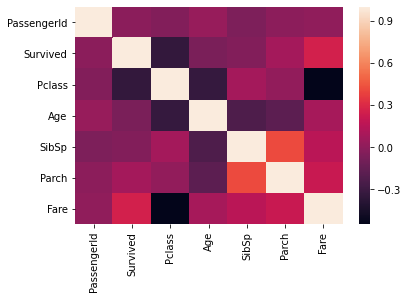

In [8]:
## 상관계수 확인
sns.heatmap(df.corr())

## EDA

##### Embarked와 Survived 변수 관계 파악

In [9]:
df_na[["Survived","Embarked"]]

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S
...,...,...
886,0,S
887,1,S
888,0,S
889,1,C


In [10]:
### 수직 정렬(변수 값이 세로로 나열됨)
df_na[["Embarked","Survived","PassengerId"]].groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 219

In [11]:
### 수평 정렬렬(피벗 테이블처럼 됨)
df_na[["Embarked","Survived","PassengerId"]].groupby(["Embarked","Survived"]).count().unstack()

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  219

<AxesSubplot:xlabel='Embarked'>

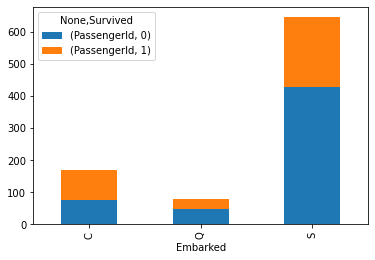

In [12]:
# 누적 막대 그래프
embarked_df = df_na[["Embarked","Survived","PassengerId"]].groupby(["Embarked","Survived"]).count().unstack()
embarked_df.plot.bar(stacked=True)

승선 항구가 C인 경우 절반정도 사망했지만 Q,S인 경우 절반 이상이 사망한 것을 확인할 수 있다. >> 승선 항구에 따라 승객 유형이나 상태에 차이가 있다고 추측할 수 있다.

In [13]:
### 수치로 확인하기
embarked_df["survived_rate"]=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])

In [14]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  219      0.660991

##### 성별과 티켓 등급 시각화 하기

In [15]:
sex_df = df_na[["Sex","Survived", "PassengerId"]].groupby(["Sex","Survived"]).count().unstack()

In [16]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<AxesSubplot:xlabel='Sex'>

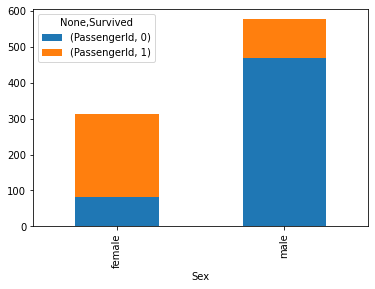

In [17]:
sex_df.plot.bar(stacked=True)

성별에 따라 사망자 비율이 다른것을 알 수 있다.

In [18]:
ticket_df = df_na[["Pclass","PassengerId","Survived"]].groupby(["Pclass","Survived"]).count().unstack()
ticket_df

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

<AxesSubplot:xlabel='Pclass'>

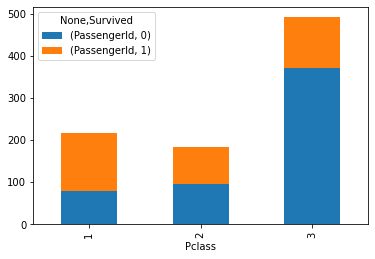

In [19]:
ticket_df.plot.bar(stacked=True)

Pclass값이 작을수록(티켓 등급이 높을수록) 생존자의 수가 많은 것을 확인할 수 있다.

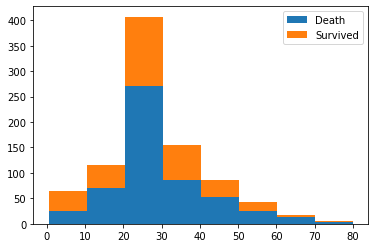

In [20]:
### 연령별 생존율 히스토그램
import matplotlib.pyplot as plt
plt.hist(x = [df_na.Age[df_na["Survived"]==0], df_na.Age[df_na["Survived"]==1]], bins = 8, histtype = "barstacked", label = ["Death","Survived"])
plt.legend()

어릴수록 생존자가 더 많은 것을 확인할 수 있다.

# 전처리

범주형 변수의 경우 수치형 변수로 바꾸는 인코딩작업을 진행한다.

In [21]:
df_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Name 및 Ticket의 경우 생존에 대해 예측할 때 영향을 주는 변수가 될 수 없다고 판단하여 데이터에서 삭제하도록 한다.

In [24]:
df_new = df_na.drop(columns = ["Name", "Ticket"])

In [26]:
df_new_dummy = pd.get_dummies(df_new, drop_first = True)

In [27]:
df_new_dummy

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


여기서 PassenerId는 단순히 승객들의 ID 이므로 삭제하도록 한다.

In [28]:
df_new_dummy = df_new_dummy.drop(columns="PassengerId")

# 모델링

##### Train/Test 분할

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_new_dummy.drop(columns = "Survived")
y = df_new_dummy["Survived"]

랜덤 시드를 고정한다!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1234)

In [33]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
673,2,31.000000,0,0,13.0000,1,0,1
60,3,22.000000,0,0,7.2292,1,0,0
880,2,25.000000,0,1,26.0000,0,0,1
190,2,32.000000,0,0,13.0000,0,0,1
388,3,29.699118,0,0,7.7292,1,1,0
...,...,...,...,...,...,...,...,...
605,3,36.000000,1,0,15.5500,1,0,1
824,3,2.000000,4,1,39.6875,1,0,1
588,3,22.000000,0,0,8.0500,1,0,1
417,2,18.000000,0,2,13.0000,0,0,1


##### 인공신경망

In [35]:
import tensorflow as tf
from tensorflow import keras

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [8])) ## column 수 > input_shape = [column 수, ] >> 알아볼 것
model.add(keras.layers.Dense(300, activation = "relu"))  ## 16의 배수로 dense 설정하기
model.add(keras.layers.Dense(2, activation = "softmax")) ## 마지막 층은 라벨의 개수만큼 지정해준다.

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               2700      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 602       
Total params: 3,302
Trainable params: 3,302
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
23/23 [==============================] - 1s 2ms/step - loss: 4.0661 - accuracy: 0.5978
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 1.8254 - accuracy: 0.6084
Epoch 3/30
23/23 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.6606
Epoch 4/30
23/23 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.6400
Epoch 5/30
23/23 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6719
Epoch 6/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6862
Epoch 7/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7201
Epoch 8/30
23/23 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.6931
Epoch 9/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.6284
Epoch 10/30
23/23 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6667
Epoch 11/30
23/23 [

train 데이터에 대해서 정확도는 71퍼센트가 나온다.

##### 모델을 사용해 예측 만들기

In [52]:
y_proba = model.predict(X_test)

In [53]:
y_proba

array([[0.3705283 , 0.6294717 ],
       [0.17814301, 0.821857  ],
       [0.17313166, 0.8268683 ],
       [0.3371876 , 0.6628124 ],
       [0.02332314, 0.9766768 ],
       [0.35262817, 0.6473718 ],
       [0.3677263 , 0.63227373],
       [0.22053863, 0.7794613 ],
       [0.5100808 , 0.4899192 ],
       [0.10836906, 0.8916309 ],
       [0.44044927, 0.55955076],
       [0.36929896, 0.63070095],
       [0.41655836, 0.5834417 ],
       [0.30850676, 0.6914932 ],
       [0.16206813, 0.8379319 ],
       [0.2585833 , 0.7414167 ],
       [0.18843888, 0.8115611 ],
       [0.19823441, 0.8017656 ],
       [0.30243808, 0.6975619 ],
       [0.27036935, 0.72963065],
       [0.3570366 , 0.64296335],
       [0.27362266, 0.72637737],
       [0.07744681, 0.9225532 ],
       [0.32493946, 0.6750605 ],
       [0.04531194, 0.954688  ],
       [0.15913528, 0.8408648 ],
       [0.15828513, 0.84171486],
       [0.30646473, 0.69353527],
       [0.02280706, 0.97719294],
       [0.2833923 , 0.7166077 ],
       [0.

In [55]:
# class에 대한 값만 보기
y_pred = model.predict_classes(X_test)
y_pred

C:\Users\qotnd\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [61]:
# test 데이터 셋 평가하기
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"acc : {acc*100}%")

acc : 43.575418994413404%


##### 인공 신경망의 장단점
- 장점 : 비선형 예측을 가능하게 하고 복잡한 의사결정문제에 대해 보다 정확한 지원을 가능하게 한다.
- 단점 : 의사결정에서 "왜 이런 값이 예측됐는가?"에 대한 설명이 불가능하다.

##### LightGBM

In [62]:
import lightgbm as lgb

In [68]:
lgb_clf = lgb.LGBMClassifier(num_leaves = 31, objective = 'binary')

In [69]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(objective='binary')

In [70]:
y_pred_lgbm = lgb_clf.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"acc : {accuracy}%")

acc : 0.7988826815642458%


##### lightgbm 장단점
- 장점
1. 학습하는 데 걸리는 시간이 적다
2. categorical feature들이 자동으로 변환된다.
3. GPU학습을 지원한다.

- 단점
1. 작은 데이터셋을 사용할 경우 과적합 가능성이 크다(일반적으로 만개 이하의 데이터는 적다)

##### XGBoost

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb_clf = XGBClassifier(n_estimators = 100, random_state = 156)

In [99]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=156)

In [100]:
pred_xgb = xgb_clf.predict(X_test)

In [101]:
acc = accuracy_score(pred_xgb, y_test)
print(f"Accuracy : {acc}")

Accuracy : 0.8100558659217877


XGB가 가장 좋은 성능을 가진다.

##### XGBoost란?
1. Boosting 기법을 이용하여 구현한 알고리즘으로, 병렬학습이 지원된다.
2. Regression, Classification 문제 모두를 지원하며, 성능과 자원 효율이 좋아서 인기있게 사용되는 알고리즘이다.
3. 기존 Gradient Tree Boosting 알고리즘에 과적합 방지를 위한 기법이 추가된 지도학습 알고리즘이다.

- 장점
1. GBM 대비 빠른 수행시간을 가진다.
2. 병렬 처리로 학습, 분류 속도가 빠르다.
3. 과적합을 규제한다.
4. 분류와 회귀 영역에서 뛰어난 예측성능을 발휘한다.

- 단점
1. 작은 데이터에 대해서 과적합 가능성이 존재한다.
2. 해석이 어렵다. 모든 앙상블 계열 알고리즘이 갖는 근원적인 문제로 입력 변수에 대해 출력 변수가 어떻게 변하는지에 대한 해석이 어렵다.